## Simple Gaussians

First import some modules.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

Now make two arrays: one with coordinates on the x-axis and the other with coordinates on the y axis.

In [2]:
xs = np.linspace(-4, 4, num=300)
ys = np.exp(-(xs**2/2))


Now plot it!

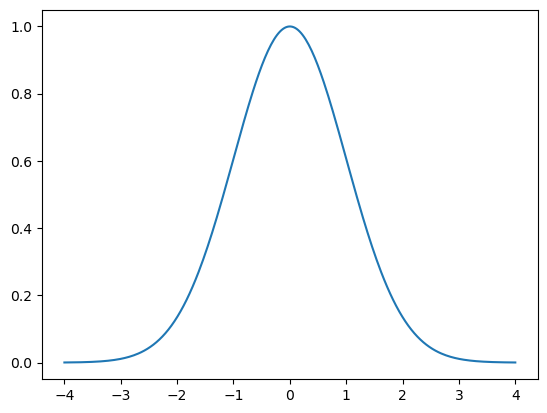

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.plot(xs, ys)

Now make a custom background color!

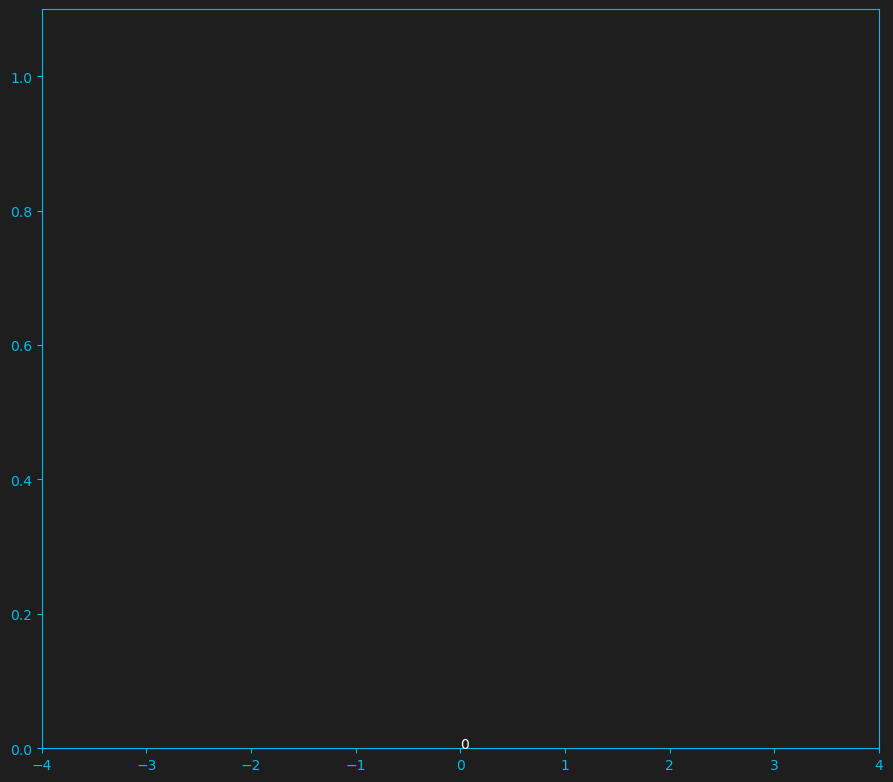

In [38]:
dpi = 100
width = 1080 / dpi
height = 1920 / 2 / dpi
seconds = 10
frame_rate_ms = 33
bgcolor = "#1E1E1E"
line_color = "#73FBD3"
axis_color = "#01BAEF"
annotation_color = "#FFFFFF"
# heading_text_color = "#FC7753"

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(width, height), dpi=dpi)
axs.set_facecolor(bgcolor)
fig.set_facecolor(bgcolor)
axs.tick_params(axis="x", colors=axis_color)
axs.tick_params(axis="y", colors=axis_color)

for spine_direction in ["top", "right", "bottom", "left"]:
    axs.spines[spine_direction].set_color(axis_color)

line2 = axs.plot(xs[0], ys[0], color=line_color, lw=5, solid_capstyle="round")[0]
axs.set(xlim=[-4, 4], ylim=[0, 1.1])
annotation = plt.annotate("Look at me!", xy=(0, 0), color=annotation_color)

def update(frame):
    line2.set_xdata(xs[:frame])
    line2.set_ydata(ys[:frame])
    annotation.set_text(f"{frame}")
    return line2, annotation

ani = animation.FuncAnimation(fig=fig, func=update, frames=int(seconds*frame_rate_ms), interval=frame_rate_ms)
ani.save(filename=os.path.join("output", "single_gaussian.mp4"), writer="ffmpeg")